# Multi Perceptron

In [2]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import numpy as np

In [3]:
digit = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.52422335
Iteration 2, loss = 0.36435260
Iteration 3, loss = 0.23853003
Iteration 4, loss = 0.16858127
Iteration 5, loss = 0.14023081
Iteration 6, loss = 0.12054241
Iteration 7, loss = 0.10031613
Iteration 8, loss = 0.08733055
Iteration 9, loss = 0.07699140
Iteration 10, loss = 0.06712263
Iteration 11, loss = 0.05992759
Iteration 12, loss = 0.06067574
Iteration 13, loss = 0.05113443
Iteration 14, loss = 0.04509962
Iteration 15, loss = 0.04058126
Iteration 16, loss = 0.03997021
Iteration 17, loss = 0.03593006
Iteration 18, loss = 0.03419470
Iteration 19, loss = 0.03081335
Iteration 20, loss = 0.02920397
Iteration 21, loss = 0.02810064
Iteration 22, loss = 0.02625410
Iteration 23, loss = 0.02458839
Iteration 24, loss = 0.02320100
Iteration 25, loss = 0.02268103
Iteration 26, loss = 0.02100454
Iteration 27, loss = 0.02054366
Iteration 28, loss = 0.01924322
Iteration 29, loss = 0.01878687
Iteration 30, loss = 0.01769292
Iteration 31, loss = 0.01746187
Iteration 32, los

MLPClassifier(batch_size=32, hidden_layer_sizes=100, max_iter=300, solver='sgd',
              verbose=True)

In [12]:
res = mlp.predict(X_test)

In [13]:
conf = np.zeros((10, 10))

for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1

print(conf)

[[76.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 64.  0.  0.  0.  0.  1.  0.  6.  0.]
 [ 0.  0. 65.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 75.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 70.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0. 78.  0.  0.  0.  1.]
 [ 1.  2.  0.  0.  0.  0. 75.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 57.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0. 59.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0. 77.]]


In [14]:
no_correct = 0

for i in range(10):
    no_correct += conf[i][i]

accuracy = no_correct / len(res)
print('테스트 집합에 대한 정확률은', accuracy * 100, '%입니다.')

테스트 집합에 대한 정확률은 96.80111265646731 %입니다.


## hyper parameter optimization

In [27]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve

import numpy as np
import matplotlib.pyplot as plt
import time

In [28]:
digit = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

In [32]:
start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')

prange = range(50, 1001, 50)

train_score, test_score = validation_curve(mlp, X_train, y_train, param_name='hidden_layer_sizes', param_range=prange, cv=10, scoring='accuracy', n_jobs=4)

end = time.time()

print('하이퍼 파라미터 최적화에 걸린 시간은', end - start, '초입니다.')

하이퍼 파라미터 최적화에 걸린 시간은 220.25112795829773 초입니다.


In [34]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

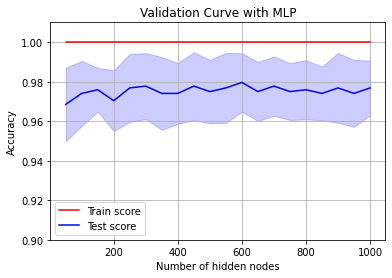

In [35]:
plt.plot(prange, train_mean, label='Train score', color='r')
plt.plot(prange, test_mean, label='Test score', color='b')

plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha=0.2, color='b')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

In [38]:
best_number_nodes = prange[np.argmax(test_mean)]
print('\n최적의 은닉층의 노드 개수는', best_number_nodes, '개입니다.\n')


최적의 은닉층의 노드 개수는 600 개입니다.



In [39]:
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
mlp_test.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=600, max_iter=300, solver='sgd')

In [40]:
res = mlp_test.predict(X_test)

In [41]:
conf = np.zeros((10, 10))

for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1

print(conf)

[[66.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 70.  0.  0.  0.  0.  1.  0.  3.  0.]
 [ 0.  0. 64.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 71.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 74.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 72.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0. 72.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 71.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  1.  1. 66.  0.]
 [ 0.  1.  0.  0.  0.  3.  0.  1.  0. 75.]]


In [42]:
no_correct = 0

for i in range(10):
    no_correct += conf[i][i]

accuracy = no_correct / len(res)
print('테스트 집합에 대한 정확률은', accuracy * 100, '%입니다.')

테스트 집합에 대한 정확률은 97.49652294853965 %입니다.
